In [1]:
#load libraries
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import anndata
import h5py

import celloracle as co

In [2]:
# visualization settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

In [48]:
# input and output paths
output_dir = "/ocean/projects/cis240075p/asachan/datasets/TA_muscle/celloracle_outs"
adata_F_KO_path = "/ocean/projects/cis240075p/asachan/bio_informatics_analysis/TA_muscle_mouse_analysis/Seurat_analysis_outputs/objects/F7_KO.h5ad"
adata_F_WT_path = "/ocean/projects/cis240075p/asachan/bio_informatics_analysis/TA_muscle_mouse_analysis/Seurat_analysis_outputs/objects/F15_WT.h5ad"
adata_M_KO_path = "/ocean/projects/cis240075p/asachan/bio_informatics_analysis/TA_muscle_mouse_analysis/Seurat_analysis_outputs/objects/M4_KO.h5ad"
adata_M_WT_path = "/ocean/projects/cis240075p/asachan/bio_informatics_analysis/TA_muscle_mouse_analysis/Seurat_analysis_outputs/objects/M11_WT.h5ad"
os.makedirs(output_dir, exist_ok=True)

In [49]:
# load anndata
adata_F_KO = sc.read(adata_F_KO_path)
adata_F_WT = sc.read(adata_F_WT_path)
adata_M_KO = sc.read(adata_M_KO_path)
adata_M_WT = sc.read(adata_M_WT_path)

In [53]:
adata_F_KO

AnnData object with n_obs × n_vars = 10169 × 3004
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'log10GenesPerUMI', 'seurat_clusters', 'RNA_snn_res.0.6', 'cell_type', 'condition', 'n_counts_all', 'n_counts'
    var: 'highly_variable', 'n_counts', 'mt', 'linc', 'rps', 'rpl'
    uns: 'cell_type_colors', 'harmony', 'pca'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs', 'harmony'
    layers: 'counts', 'raw_count'
    obsp: 'nn', 'snn'

In [57]:
# check the layer values of counts and raw count
print(adata_F_KO.layers["counts"])   

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2462733 stored elements and shape (10169, 3004)>
  Coords	Values
  (0, 10)	8.0
  (0, 11)	7.0
  (0, 18)	9.0
  (0, 53)	1.0
  (0, 65)	4.0
  (0, 67)	5.0
  (0, 95)	1.0
  (0, 117)	12.0
  (0, 139)	3.0
  (0, 147)	1.0
  (0, 148)	1.0
  (0, 149)	1.0
  (0, 157)	1.0
  (0, 161)	1.0
  (0, 163)	4.0
  (0, 188)	1.0
  (0, 190)	2.0
  (0, 195)	1.0
  (0, 211)	1.0
  (0, 231)	1.0
  (0, 235)	1.0
  (0, 242)	1.0
  (0, 250)	3.0
  (0, 262)	3.0
  (0, 268)	56.0
  :	:
  (10168, 2614)	6.0
  (10168, 2628)	1.0
  (10168, 2640)	4.0
  (10168, 2653)	1.0
  (10168, 2689)	2.0
  (10168, 2706)	1.0
  (10168, 2714)	1.0
  (10168, 2715)	1.0
  (10168, 2717)	3.0
  (10168, 2721)	4.0
  (10168, 2735)	2.0
  (10168, 2747)	3.0
  (10168, 2769)	9.0
  (10168, 2802)	1.0
  (10168, 2824)	478.0
  (10168, 2825)	23.0
  (10168, 2829)	5.0
  (10168, 2839)	1.0
  (10168, 2873)	2.0
  (10168, 2936)	4.0
  (10168, 2938)	8.0
  (10168, 2944)	2.0
  (10168, 2948)	57.0
  (10168, 2965)	3.0
  (10168, 299

In [58]:
# check the layer values of counts and raw count
print(adata_F_KO.layers["norm_count"])   

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2462733 stored elements and shape (10169, 3004)>
  Coords	Values
  (0, 10)	2.905650845385295
  (0, 11)	2.781977238603332
  (0, 18)	3.0154521664459084
  (0, 53)	1.1697621412182524
  (0, 65)	2.2756139262660593
  (0, 67)	2.4748893335720097
  (0, 95)	1.1697621412182524
  (0, 117)	3.2860330560472044
  (0, 139)	2.0252007071240485
  (0, 147)	1.1697621412182524
  (0, 148)	1.1697621412182524
  (0, 149)	1.1697621412182524
  (0, 157)	1.1697621412182524
  (0, 161)	1.1697621412182524
  (0, 163)	2.2756139262660593
  (0, 188)	1.1697621412182524
  (0, 190)	1.6879947818627261
  (0, 195)	1.1697621412182524
  (0, 211)	1.1697621412182524
  (0, 231)	1.1697621412182524
  (0, 235)	1.1697621412182524
  (0, 242)	1.1697621412182524
  (0, 250)	2.0252007071240485
  (0, 262)	2.0252007071240485
  (0, 268)	4.768431458351799
  :	:
  (10168, 2614)	3.290704811527185
  (10168, 2628)	1.5948802983449653
  (10168, 2640)	2.881001603686857
  (10168, 2653)	1.594880

In [63]:
# load a pre-computed base grn 
base_GRN = co.data.load_mouse_scATAC_atlas_base_GRN()
base_GRN.head()

,peak_id,gene_short_name,9430076c15rik,Ac002126.6,Ac012531.1,Ac226150.2,Afp,Ahr,Ahrr,Aire,...,Znf784,Znf8,Znf816,Znf85,Zscan10,Zscan16,Zscan22,Zscan26,Zscan31,Zscan4
0,chr10_100050979_100052296,4930430F08Rik,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chr10_101006922_101007748,SNORA17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,chr10_101144061_101145000,Mgat4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,chr10_10148873_10149183,9130014G24Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chr10_10149425_10149815,9130014G24Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## KO Cells GRN inference

... storing 'orig.ident' as categorical
... storing 'condition' as categorical


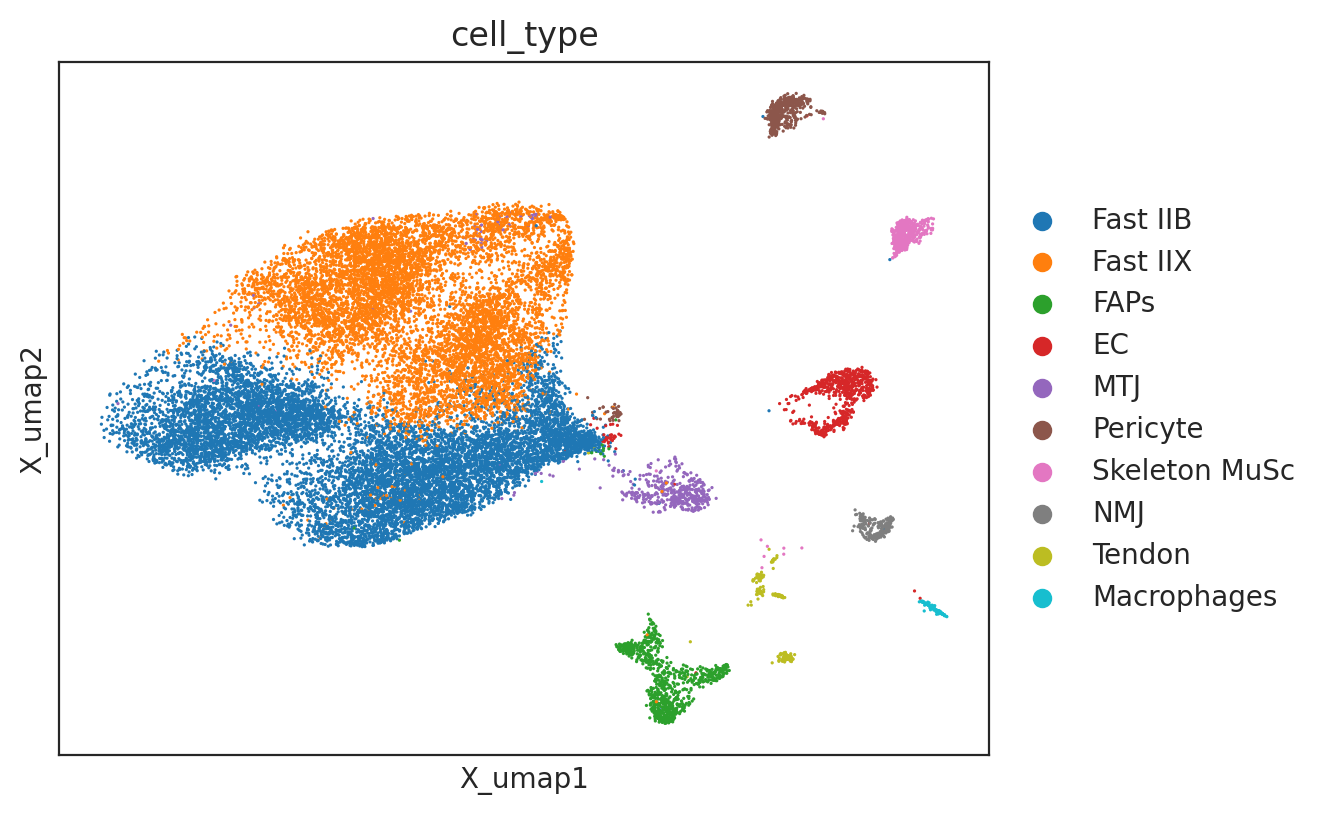

In [64]:
#load oracle object
oracle = co.Oracle() 
# use unscaled counts for grn inference 
subset_KO.X = subset_KO.layers['counts'].copy()
#load data in the oracle object
oracle.import_anndata_as_raw_count(adata=subset_KO, cluster_column_name='cell_type', embedding_name='X_umap')
oracle.import_TF_data(TF_info_matrix=base_GRN)

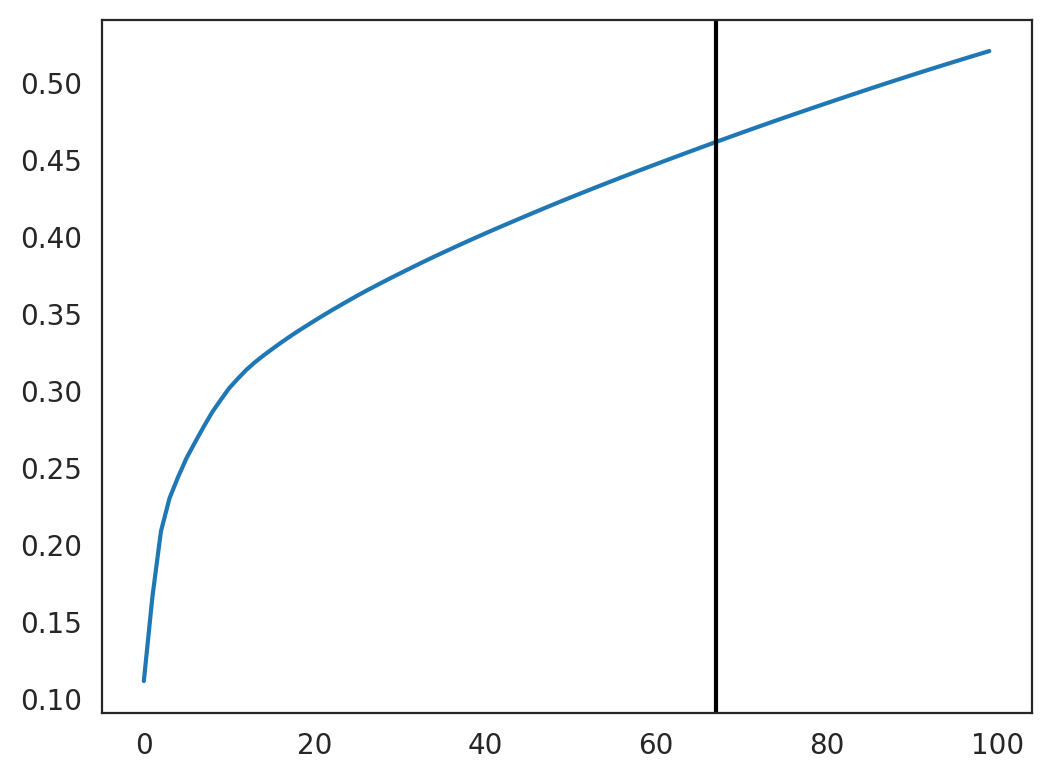

67


In [65]:
#KNN imputation: get lower dim embedding of features by pca
oracle.perform_PCA() #as we used raw counts from anndata to make this oracle object
#select top PCs by thresholding the number of components by the ratio of variance explained by them
plt.plot(np.cumsum(oracle.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(oracle.pca.explained_variance_ratio_))>0.002))[0][0]
plt.axvline(n_comps, c="k")
plt.show()
print(n_comps)
n_comps = min(n_comps, 50)

In [68]:
#KNN imputation: run nearest neighbor imputation
n_cell = oracle.adata.shape[0]
print(f"cell number is :{n_cell}")


cell number is :22187


In [69]:
#KNN imputation: run nearest neighbor imputation
k = int(0.025*n_cell)
print(f"Auto-selected k is :{k}")
oracle.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8,
                      b_maxl=k*4, n_jobs=4)

Auto-selected k is :554


In [ ]:
%%time
#Construct GRN for each cell-type 
links = oracle.get_links(cluster_name_for_GRN_unit = "cell_type", alpha=10, verbose_level=10)

In [ ]:
#save the links
links_dict_df = pd.DataFrame([(k, v) for k, values in links.links_dict.items() for v in values], columns=['Key', 'Value'])
links_dict_df.to_csv("/ix/djishnu/Akanksha/ERCC1_snRNA_analysis/CellOracle_analysis_outputs/links_dict_KO.csv", index=False)